In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('AirPassengers.csv')

In [3]:
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
indexed_dataset = dataset.set_index(['Month'])
indexed_dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Number of Passengers')

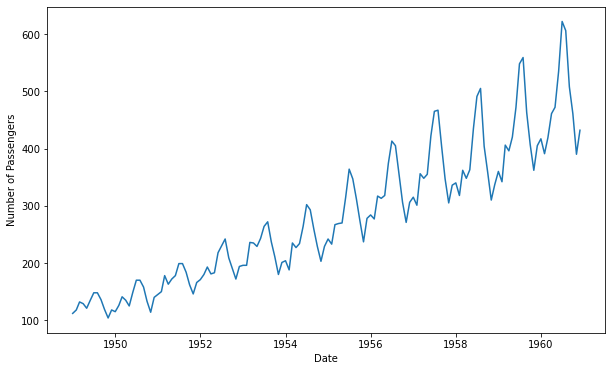

In [8]:
plt.plot(indexed_dataset)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')

Text(0.5, 1.0, 'Rolling Mean vs Standard Deviation')

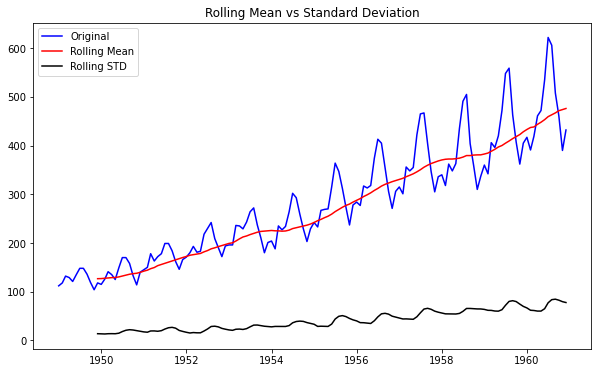

In [9]:
#Rolling Statistics

rolmean = indexed_dataset.rolling(window=12).mean()
rolstd = indexed_dataset.rolling(window=12).std()

#Plot Rolling Statistics 
orig = plt.plot(indexed_dataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean vs Standard Deviation')

In [10]:
# ADCF test

from statsmodels.tsa.stattools import adfuller

dftest = adfuller(indexed_dataset['#Passengers'], autolag='AIC')

df_output = pd.Series(dftest[0:4],index=['Test Statistic', 'p-value', '#Lags used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    df_output['Critical Value (%s)' %key] = value
        
print(df_output)

Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


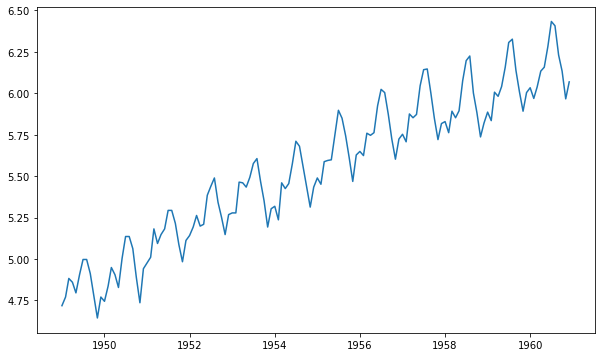

In [11]:
# 1) Converting Series into log scale
indexed_dataset_logScale = np.log(indexed_dataset)
plt.plot(indexed_dataset_logScale)

Text(0.5, 1.0, 'Rolling Mean vs Standard Deviation')

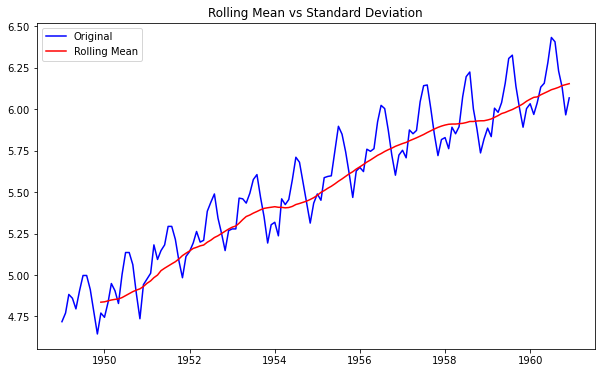

In [12]:
movingAverage = indexed_dataset_logScale.rolling(window=12).mean()
movingSTD = indexed_dataset_logScale.rolling(window=12).std()

#Plot Rolling Statistics 
orig = plt.plot(indexed_dataset_logScale, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean vs Standard Deviation')

In [13]:
# 2) 

datasetLogScaleMinusMovingAverage = indexed_dataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [14]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [15]:
def test_stationarity(timeseries):
    
    #Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean vs Standard Deviation')
    
    #ADCF
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')

    df_output = pd.Series(dftest[0:4],index=['Test Statistic', 'p-value', '#Lags used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        df_output['Critical Value (%s)' %key] = value
        
    print(df_output)

Test Statistic                  -3.162908
p-value                          0.022235
#Lags used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


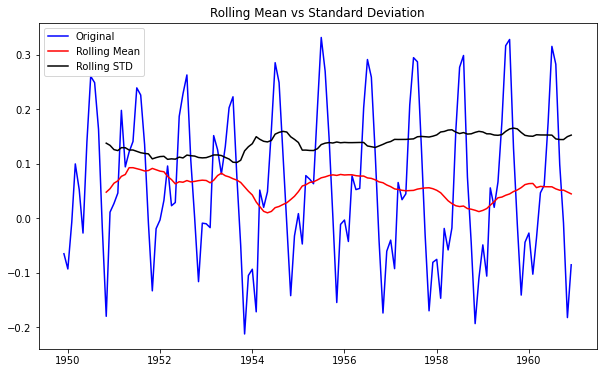

In [16]:
test_stationarity(datasetLogScaleMinusMovingAverage)

# Time shift Transformation

In [17]:
indexed_dataset_logScale - indexed_dataset

,#Passengers
Month,
1949-01-01,-107.281501
1949-02-01,-113.229315
1949-03-01,-127.117198
1949-04-01,-124.140188
1949-05-01,-116.204209
...,...
1960-08-01,-599.593120
1960-09-01,-501.769519
1960-10-01,-454.866602


In [18]:
dataset

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [19]:
dataset['Month']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [20]:
from pmdarima import auto_arima

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
auto_arima(dataset['#Passengers'],start_p =1, start_q = 1, max_p= 3, max_q = 3, m= 12, seasonal = True, trace = True, error_action = 'ignore', stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1022.299, Time=0.42 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.16 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.62 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.23 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.11 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.22 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.30 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.17 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.07 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.19 sec
 ARIMA(0,1,1)(1,1,1)[12]     

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      with_intercept=False)